<a href="https://colab.research.google.com/github/LuciusMelillo09/DataScience/blob/main/Unit6/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, it's a metric to compare different models, so it only means something if there is multiple models.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model predicts the data well based on the data you already have, but the predictions don't do a good job at adapting and generalizing to new data.

**Task3**:

How do we mitigate overfitting?

We mitigate overfitting by having a prior that is weakly informative, or regularized, so therefore the model doesn't overfit to the data you give it.

**Task4**:

How do we mitigate underfitting?

You can mitigate underfitting by having a more informative prior, that is not regularized, so the model fits more with the data

**Task5**:

Why would we want more than one predictor in a model?

Because having multiple predictors may capture more information that weren't in the data set.

**Task6**:

Can we have too many predictors? How would we know?

Yes, when the model overfits, which you can see frmo elpd_loo, that means it has too many predictors.

**Task7**:

What is variable selection, and how does it work?

Selecting the variables you use in your model. You do this by drawing a causal diagram, calculating elpd_loo, compare to another model, then make adjustments until you get the best elpd_loo value.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

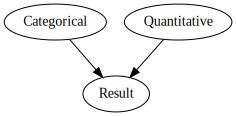

In [ ]:
dag_b = gv.Digraph(comment='model1')

dag_b.node('R', 'Result')
dag_b.node('T','Categorical')
dag_b.node('Q','Quantitative')

dag_b.edges(['TR', 'QR',])

dag_b

Since in this model, there are 2 priors, it's possible that this model would overfit the data.

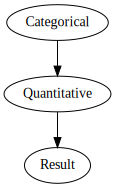

In [ ]:
dag_b = gv.Digraph(comment='model1')

dag_b.node('R', 'Result')
dag_b.node('T','Categorical')
dag_b.node('Q','Quantitative')

dag_b.edges(['TQ', 'QR',])

dag_b

This model is based more of a hierarchal, with just one linear path. This should mean it's less likely to overfit

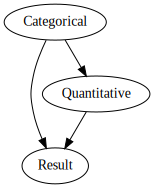

In [ ]:
dag_b = gv.Digraph(comment='model1')

dag_b.node('R', 'Result')
dag_b.node('T','Categorical')
dag_b.node('Q','Quantitative')

dag_b.edges(['TR', 'QR', 'TQ'])

dag_b

This model is sort of a mix between the first two, where both Categorical and Quantitative act as priors for the Result, but Categorical also acts as a hyperprior in a way when it goes through the Quantitative

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You visualize multiple linear regression models by using pair plots, showing a scatterplot for every pair of variable.

You can't visualize the entire model all at once if it has more than two predictors

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
!pip install bambi
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 14.6 MB/s eta 0:00:00


In [ ]:
model = bmb.Model("FGp ~ FTp + Pos", data=bb)
idata = model.fit(idata_kwargs={'log_likelihood': True})

Output()

In [ ]:
#Used Gemini to make the rest of these models, extrapolating from my first model
model2 = bmb.Model("FGp ~ FTp + (FTp|Pos)", data=bb)
idata2 = model2.fit(idata_kwargs={'log_likelihood': True})

Output()

ERROR:pymc.stats.convergence:There were 88 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

KeyError: '3P_ATT'

In [ ]:
model3 = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
idata3 = model3.fit(idata_kwargs={'log_likelihood': True})

Output()

In [ ]:
model4 = bmb.Model("FGp ~ FTp * Pos * `3PA`", data=bb)
idata4 = model4.fit(idata_kwargs={'log_likelihood': True})

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.027       127          28.69 draws/s    0:01:09   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.032       127          14.29 draws/s    0:02:19   0:00:00

In [15]:
model5 = bmb.Model("FGp ~ FTp + Pos + `3PA` + Pos:`3PA`", data=bb)
idata5 = model5.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


        rank    elpd_loo      p_loo  elpd_diff        weight         se  \
model4     0  530.104616  21.868439   0.000000  4.390801e-01  14.408260   
model5     1  529.591292  13.070865   0.513324  5.609199e-01  15.914952   
model3     2  509.640016  13.542172  20.464600  0.000000e+00  16.716517   
model2     3  508.531822  12.298925  21.572794  0.000000e+00  16.455252   
model1     4  507.242115   8.449840  22.862501  6.217249e-15  16.119370   

             dse  warning scale  
model4  0.000000     True   log  
model5  6.079408    False   log  
model3  8.583971    False   log  
model2  8.303389    False   log  
model1  8.420924    False   log  


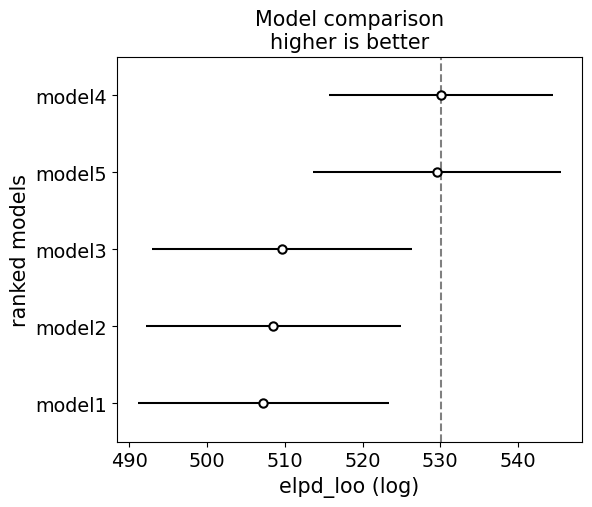

In [16]:
idatas = {'model1': idata, 'model2': idata2, 'model3': idata3, 'model4': idata4, 'model5': idata5}
compare_df = az.compare(idatas)
print(compare_df)
az.plot_compare(compare_df)
plt.show()

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Model4

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [17]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [18]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


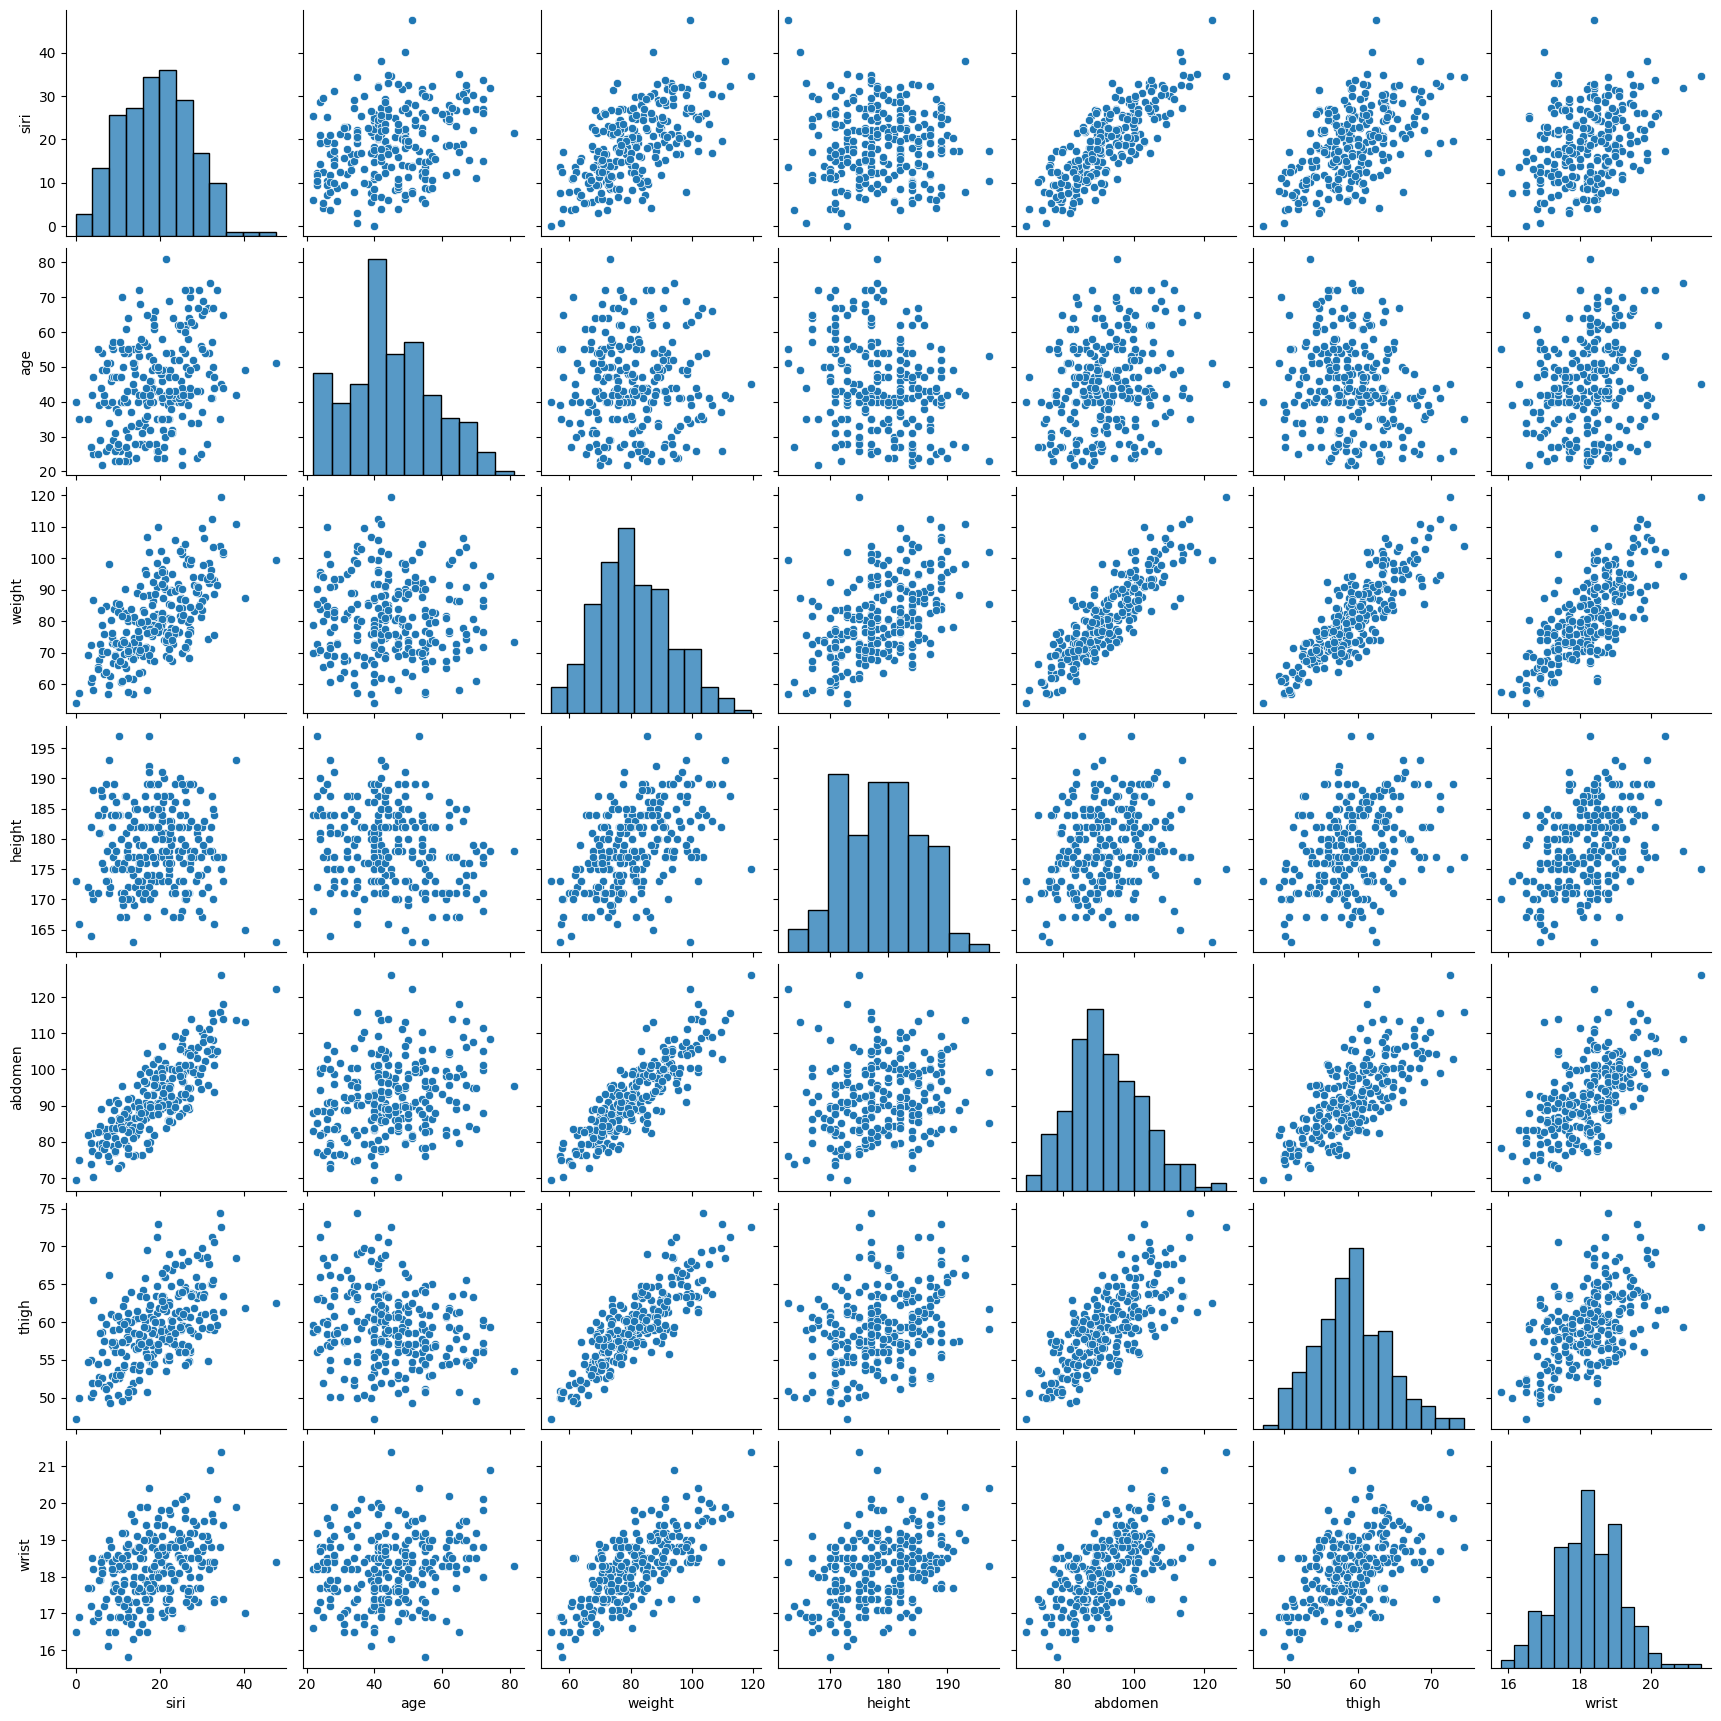

In [19]:
sns.pairplot(body)

I would choose to predict weight, because the Abdomen, Thigh, and Wrist measurements all have a direct relation to weight

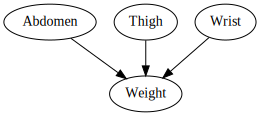

In [24]:
dag_weight = gv.Digraph(comment='weight')
dag_weight.node('A', 'Abdomen')
dag_weight.node('B','Thigh')
dag_weight.node('C','Wrist')
dag_weight.node('D', 'Weight')

dag_weight.edges(['AD', 'BD', 'CD',])

dag_weight